In [ ]:
from diffusion_curvature.datasets import *
from diffusion_curvature.graphtools import *
from diffusion_curvature.kernels import *
import matplotlib.pyplot as plt
import numpy as np
import graphtools
%load_ext autoreload
%autoreload 2

# Examples
Here we use the diffusion curvature method on our corpus of toy datasets, comparing the ground-truth gaussian curvatures (for the two-dimensional toy datasets) with the diffusion curvature -- and wading into the details of hyperparameters and how to best tune diffusion curvature for a given dataset.


In [ ]:
def visualize_2_curvatures(X,k1,k2):
    """Makes two side-by-side 3d plots of X, the first colored by k1, the second by k2. A colorbar accompanies each."""
    fig = plt.figure(figsize=(12,6))
    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122, projection='3d')
    ax1.scatter(X[:,0], X[:,1], X[:,2], c=k1, cmap='jet')
    ax2.scatter(X[:,0], X[:,1], X[:,2], c=k2, cmap='jet')
    ax1.set_title('Gaussian curvature')
    ax2.set_title('Diffusion curvature')
    fig.colorbar(ax1.scatter(X[:,0], X[:,1], X[:,2], c=k1, cmap='jet'), ax=ax1)
    fig.colorbar(ax2.scatter(X[:,0], X[:,1], X[:,2], c=k2, cmap='jet'), ax=ax2)
    plt.show()

For the hyperboloid, we found these parameters to be most impactful:

- `anisotropy=1`, when constructing the Graphtools graph. This combats some of the fluctuations in curvature caused by local density variations.
- `knn=10`: large enough to allow diffusion to cover the graph, local enough to capture the curvature

Note that our pointcloud, unlike the ideal hyperboloid, cuts off at the top and bottom, causing diffusion to rebound and giving the impression of higher curvatures.

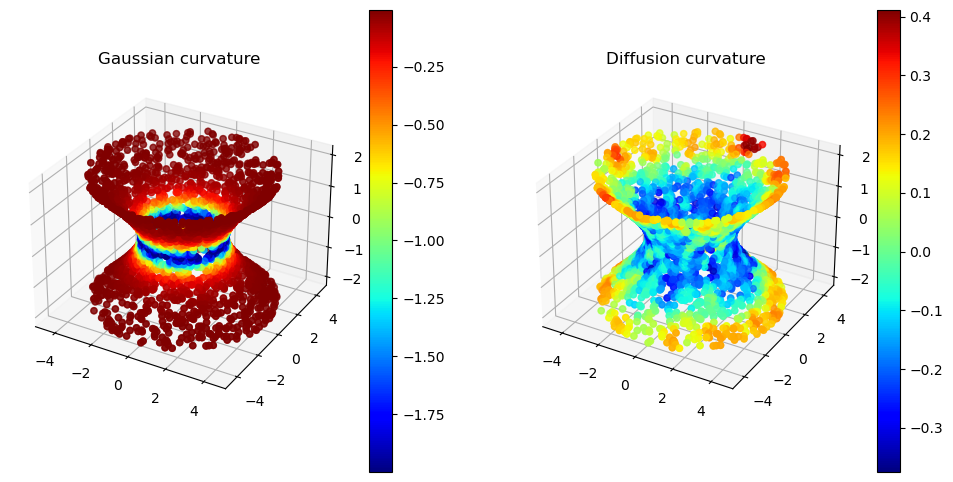

In [ ]:
X_hyperboloid, ks_hyperboloid = hyperboloid(3000)
G_hyperboloid = graphtools.Graph(X_hyperboloid, knn=10, anisotropy=1)
DC = DiffusionCurvature(t=15)
G_hyperboloid = DC.curvature(G_hyperboloid, dimension=2)
visualize_2_curvatures(X_hyperboloid, ks_hyperboloid, G_hyperboloid.ks)

As the sphere shows, 

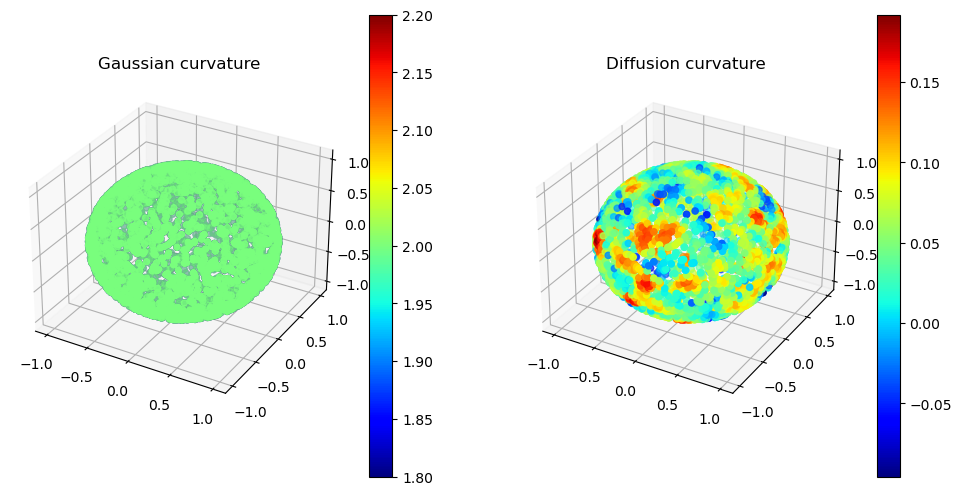

In [ ]:
X_sphere, ks_sphere = sphere(3000)
G_sphere = graphtools.Graph(X_sphere, knn=15, anisotropy=1)
DC = DiffusionCurvature(t=15)
G_sphere = DC.curvature(G_sphere,dimension=2)
visualize_2_curvatures(X_sphere, ks_sphere, G_sphere.ks)


# Pure Graphs
Diffusion curvature was designed for pointclouds, and it's in this domain that it shows the clearest advantages over competing methods, like Ollivier Ricci curvature. But it can also be used directly on an adjacency matrix. Here's how: